## Gmartket 베스트 상품 이미지 크롤링

### Gmartket 베스트 상품 이미지 크롤링
* 패션 의류 탑 5 상품 이미지

In [1]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

In [2]:
products

[<li class="first">
 <p class="no1" id="no1">1</p>
 <div class="thumb">
 <a href="http://item.gmarket.co.kr/Item?goodscode=1975776752&amp;ver=637987669484873927" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '1975776752'});"><img alt="(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈" class="lazy" data-original="//gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/></a>
 </div>
 <!--div class="goods-view">
 									<a href="http://minishop.gmarket.co.kr/roadbling"><span class="view">판매자 다른상품 보기</span>로드블링</a>
 								</div-->
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=1975776752&amp;ver=637987669484873927" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '1975776752'});">(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈</a>
 <div class="item_price">
 <div class="o-price"><span class="for-a11y">정가</span><span>43,000원</span></div>
 <div class="s-price">
 <span class="

In [3]:
len(products)

100

In [7]:
products[0].select_one('a.itemname').get_text()

'(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈'

In [9]:
img_tag = products[0].select_one('img.lazy')
img_tag

<img alt="(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈" class="lazy" data-original="//gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/>

In [10]:
img_tag['data-original']

'//gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

In [11]:
img_tag['src']

'//image.gmarket.co.kr/challenge/neo_image/no_image.gif'

In [12]:
'https:'+ img_tag['data-original']

'https://gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

In [13]:
'https:'+ img_tag['src']

'https://image.gmarket.co.kr/challenge/neo_image/no_image.gif'

In [14]:
img_url = 'https:'+ img_tag['data-original']
img_url

'https://gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

In [16]:
## 이미지 다운로드
from urllib.request import urlopen
imgUrl = 'https://gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

index = 0
with urlopen(imgUrl) as f:
    with open('./image/crawl/img'+ str(index +1) + '.jpg','wb') as h: # w - write b - binary
        img = f.read()
        h.write(img)

## 종합코드

* 베스트 5개 이미지만 저장할 것!

In [ ]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

for index, product in enumerate(products):
    # print(index)
    
    #이미지 태그
    img_tag = product.select_one('img.lazy')
    #이미지 URL링크 만들기
    img_url = 'https:'+ img_tag['data-original']
    # print(img_url)
    
    # 이미지 저장
    with urlopen(img_url) as f:
        with open('./image/crawl/img'+ str(index +1) + '.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img)
    
    # 5개만 저장하고 for문 빠져나오기
    if index == crawl_num -1:
        break
    
print('크롤링 끝~~')

Image Crawling is done


### 파일이름에 상품명이 같이 나오도록 바꾸기

* 예) img1.jpg -> img1_겨울 따뜻한 후리스조끼플리스자켓패딩기모바지.jpg

In [ ]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

for index, product in enumerate(products):
    # print(index)
    
    pname = product.select_one('a.itemname').get_text()
    pname = pname.replace('/','')
    # print(pname)
    
    #이미지 태그
    img_tag = product.select_one('img.lazy')
    #이미지 URL링크 만들기
    img_url = 'https:'+ img_tag['data-original']
    # print(img_url)

    # 이미지 저장
    with urlopen(img_url) as f:
        with open('./image/crawl/img'+ str(index +1) +'_'+ pname + '.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img)
    
    # 5개만 저장하고 for문 빠져나오기
    if index == crawl_num -1:
        break
    
print('크롤링 끝~~')

쇼인더룸 가을신상할인 티셔츠세트팬츠빅사이즈
모노시크가을신상 티셔츠맨투맨후드니트블라우스셔츠남방가디건세트팬츠스커트데일리룩
너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔
패션라인 가을신상 원피스니트맨투맨셔츠팬츠청바지자켓데님세트상품
제이프랑 가을신상 티셔츠팬츠긴팔셋업
크롤링 끝~~


### 카테고리별 베스트 상품 크롤링 자동화

* 패션의류, 신발/잡화, 화장품/헤어, 유아동/출산 .........
* 원하는 만큼 상품 크롤링

#### 자동으로 URL 만들기

* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G02
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G03
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G04

> URL을 위의 순서처럼 순서대로 만들려면 어떻게 해야할까?

In [26]:
cats=soup.select('div.gbest-cate>ul>li')
cat_url=[]
for ix, cat in enumerate(cats):
    ca=cat.select_one('a')
    cat_url.append('http://corners.gmarket.co.kr'+ca['href'])
cat_url

['http://corners.gmarket.co.kr/Bestsellers',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G02',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G03',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G04',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G07',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G08',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G09',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G05',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G06',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G10',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G11',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G12']

#### 자동으로 4개의 카테고리 베스트 상품을 크롤링 하세요

In [81]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

cats=soup.select('div.gbest-cate>ul>li')
cat_url=[]
cat_name=[]
for ix, cat in enumerate(cats):
    ca=cat.select_one('a')
    ca1=ca.get_text().replace('/',' ')
    cat_url.append('http://corners.gmarket.co.kr'+ca['href'])
    cat_name.append(ca1)
cat_url
cat_name

crawl_num = 5   #크롤 갯수

for i in range(1,5):
    #타깃이 되는 URL
    best_url = cat_url[i]

    #HTML 가져오기
    res = requests.get(best_url)

    #HTML 파싱하여 객체에 담기
    soup = BeautifulSoup(res.content, 'html.parser')

    #태그안의 정보 빼기
    products = soup.select('div.best-list > ul > li') 

    for index, product in enumerate(products):
        # print(index)
        
        pname = product.select_one('a.itemname').get_text()
        pname = pname.replace('/','')
        # print(pname)
        
        #이미지 태그
        img_tag = product.select_one('img.lazy')
        #이미지 URL링크 만들기
        img_url = 'https:'+ img_tag['data-original']
        # print(img_url)

        # 이미지 저장
        with urlopen(img_url) as f:
            with open('./image/'+'['+cat_name[i]+']_img'+ str(index +1)+'_'+pname + '.jpg','wb') as h: # w - write b - binary
                img = f.read()
                h.write(img)
        
        # 5개만 저장하고 for문 빠져나오기
        if index == crawl_num -1:
            break








### 파일 이름이 카테고리별로 정리 되려면 어떻게 해야할까요?
>예) <br>
>img1_겨울 따뜻한 후리스조끼플리스자켓패딩기모바지.jpg <br>
>img1_[달바]화이트 트러플 미스트 세럼 180ml+180ml.jpg <br>
>크롤링한 파일이 섞여있어, 카테고리별 베스트 상품을 파악할 수 없어요. <br>

## Pillow(PIL) 모듈 체험

* 파이썬 이미징 라이브러리로서 여러 이미지 파일 포맷을 지원
* 이미지 내부 데이타를 엑세스할 수 있게 하며, 다양한 이미지 처리 기능을 제공

https://pillow.readthedocs.io/en/stable/reference/index.html

http://pythonstudy.xyz/python/article/406-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%B2%98%EB%A6%AC-Pillow


In [31]:
!pip install Pillow

### 이미지 읽고 쓰기

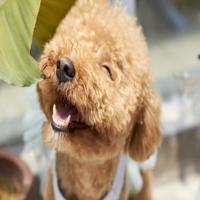

In [33]:
from PIL import Image
# 이미지 열기
tmp = Image.open('./image/dog.jpg')
tmp

In [34]:
from PIL import Image
# 이미지 열기
tmp = Image.open('./image/dog.jpg')
 
# 이미지 크기 출력
print(tmp.size)
tmp.close()

(200, 200)


In [31]:
from PIL import Image
# 이미지 열기
fileName='dog'
tmp = Image.open('./image/' + fileName + '.jpg')
 
# 이미지 크기 출력
print(tmp.size)
tmp.close()

(200, 200)


### 이미지 사이즈 조절

In [35]:
fileName='dog'
tmp=Image.open('./image/' + fileName + '.jpg')

# 200x200으로 조절
tmpResize=tmp.resize((100,100))
tmpResize.save('./image/' + fileName + '.jpg')

print('---end ---')
tmp.close()

---end ---


In [36]:
fileName='dog'
tmp=Image.open('./image/' + fileName + '.jpg')

size=300
tmpResize=tmp.resize((size,size))
tmpResize.save('./image/' + str(size) + fileName + '.jpg')
print('---end ---')
tmp.close()

---end ---


### 이미지에 로고 합성
 https://creativeworks.tistory.com/entry/PYTHON-3-Tutorials-41-Combine-Images-Together-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%B3%91%ED%95%A9%ED%95%98%EA%B8%B0-like-watermark%EC%9B%8C%ED%84%B0%EB%A7%88%ED%81%AC?category=620431

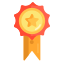

In [38]:
from PIL import Image

logo=Image.open('./image/top.png')
logo
# print(logo.size)

In [43]:
#area=(0,0,64,64)
p=Image.open('.\image\[신발 잡화]_img1_[에스콰이아]30% 에스콰이아 가을준비 FW 가방 (숄더백토트미니백외).jpg')

area=(0,0,logo.width,logo.height)

p.paste(logo,area,logo) #png 파일 배경 투명하게 붙이는 방법


p.save('.\image\[신발 잡화]_img1_[에스콰이아]30% 에스콰이아 가을준비 FW 가방 (숄더백토트미니백외)_1.jpg')
p.close()
logo.close()

## 디렉토리안 파일리스트 가져오기

In [41]:
import os
path_dir='./image'
fileList=os.listdir(path_dir)
fileList

['300dog.jpg',
 'cat.jpg',
 'crawl',
 'dog.jpg',
 'top.png',
 '[신발 잡화]_img1_[에스콰이아]30% 에스콰이아 가을준비 FW 가방 (숄더백토트미니백외).jpg',
 '[신발 잡화]_img2_[투투삭스]균일가 착용감 좋은 양말발목중목패션학생.jpg',
 '[신발 잡화]_img3_보가 가을신상 슬링백블로퍼펌프스스니커즈.jpg',
 '[신발 잡화]_img4_[디즈니]슈라모드디즈니 외 FW 1+1단품 거실화 털슬리퍼.jpg',
 '[신발 잡화]_img5_가을 신상 은침귀걸이 우영우 고래귀걸이 원터치 링 스터드.jpg',
 '[유아동 출산]_img1_[알로앤루]12%중복쿠폰 알로 알퐁소 가을신상오픈.jpg',
 '[유아동 출산]_img2_[베베앙]베베앙 아기물티슈  시그니처 대용량 100매 캡형 10팩.jpg',
 '[유아동 출산]_img3_[버블트리]주니어 여아 가을 인기 스쿨룩  상하세트 팬츠 맨투맨 원피스 레깅스.jpg',
 '[유아동 출산]_img4_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[유아동 출산]_img5_[슈퍼대디]아기물티슈  엑셀런트 82 아기물티슈 캡형 70매 20팩.jpg',
 '[패션의류]_img1_너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔.jpg',
 '[패션의류]_img2_모노시크가을신상 티셔츠맨투맨후드니트블라우스셔츠남방가디건세트팬츠스커트데일리룩.jpg',
 '[패션의류]_img3_패션라인 가을신상 원피스니트맨투맨셔츠팬츠청바지자켓데님세트상품.jpg',
 '[패션의류]_img4_제이프랑 가을신상 티셔츠팬츠긴팔셋업.jpg',
 '[패션의류]_img5_쇼인더룸 가을신상할인 티셔츠세트팬츠빅사이즈.jpg',
 '[화장품 헤어]_img1_[이니스프리](50%+10%) 전품목 빅세일+클렌징폼 선크림 핸드크림 반값.jpg',
 '[화장품 헤어]_img2_[맥퀸뉴욕]1+1 워터 벨벳 픽싱틴트 촉촉한 수분 블러링틴트 외 아이라이너아이브로우멀티밤~75%.jpg'

## 카테고리별 1등 파일에만 1등 로고합성하기

In [89]:
from gettext import find
from re import I
from PIL import Image

flist=[]
for fl in fileList:
    if 'img1' in fl:
        flist.append(f'./image/{fl}')
flist


for fl in flist:
    p=Image.open(fl)
    logo=Image.open('./image/top.png')
    area=(0,0,logo.width,logo.height)

    p.paste(logo,area,logo) #png 파일 배경 투명하게 붙이는 방법


    p.save(fl)
    p.close()
    logo.close()





